# Übung: Eigenwerte und PCA

## ✏ Aufgabe 1

Zeigen Sie:
1. Die Matrix $M=\frac{1}{5}\begin{pmatrix}3 & 4 \\-4 & 3 \end{pmatrix}$ ist orthogonal.
2. Das Produkt zweier orthogonaler Matrizen ist eine orthogonale Matrix.
3. Die Determinante einer orthogonalen Matrix ist $+1$ oder $-1$.


## ✏ Aufgabe 2

Führen Sie für die Matrix $A=\begin{pmatrix}1 & 2 & 3\\4 & 5 & 6\end{pmatrix}$ folgende Schritte durch (mit NumPy):
1. Berechnen Sie die Eigenwerte und Eigenvektoren von $A^TA$ und $AA^T$ (siehe https://numpy.org/doc/stable/reference/generated/numpy.linalg.eig.html)
2. Um sicherzugehen, dass Sie die Ergebnisse richtig interpretieren, berechnen Sie aus den Eigenwerten und Eigenvektoren wieder die Matrizen $A^TA$ und $AA^T$.

Hinweis: Schauen Sie in die NumPy Dokumentation und machen Sie sich klar, welche Rückgabewerte die Funktionen haben (bzw. welche Dimensionen die verschiedenen Matrizen haben). Vergleichen Sie die Angaben in der NumPy Dokumentation mit den Vorlesungsfolien bzw. -skript zum Thema Eigenwertzerlegung und machen Sie sich klar, welche mathematischen Objekte gemeint sind (Anmerkung: eine unitäre Matrix $U$ ist die Entsprechung einer orthogonalen Matrix in den komplexen Zahlen $\mathbb{C}$, also eine Matrix über den komplexen Zahlen mit der Eigenschaft $U^*U=I$).

## ✏ Aufgabe 3
Schauen Sie sich im folgenden Skript den Abschnitt Hauptkomponentenanalyse an, vergleichen Sie mit den Vorlesungsfolien und versuchen Sie, die einzlnen Schritte nachzuvollziehen.

### Datenset
Der folgende Code erzeugt ein Datenset, anhand dessen man die PCA gut visualisieren kann.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Wir erzeugen uns zufällige Daten in 3 Dimensionen (Source: Hands-on Machine Learning) 
np.random.seed(42)
m = 500
w1, w2 = 0.1, 0.3
noise = 0.1

angles = np.random.rand(m) * 3 * np.pi / 2 - 0.5
X = np.empty((m, 3))
X[:, 0] = np.cos(angles) + np.sin(angles)/2 + noise * np.random.randn(m) / 2
X[:, 1] = np.sin(angles) * 0.7 + noise * np.random.randn(m) / 2
X[:, 2] = X[:, 0] * w1 + X[:, 1] * w2 + noise * np.random.randn(m)

### Hauptkomponentenanalyse

<BarContainer object of 3 artists>

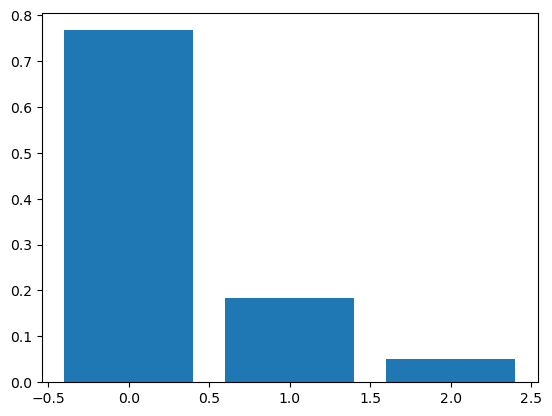

In [19]:
# Anzahl Komponenten
m = 2

# Schritt 1: Standardisieren
X_zent = (X - X.mean(axis=0)) / X.std(axis=0)

# Schritt 2: Eigenwertzerlegung der Kovarianzmatrix
eig_result = np.linalg.eig(X_zent.T@X_zent)
Vt = eig_result.eigenvectors.T
S = eig_result.eigenvalues

# Schritt 3: Projizieren auf 2D mit den ersten zwei Zeilen von VT (bzw. Spalten von V). 
# Das entspricht der .predict() Methode der PCA für zwei Hauptkomponenten).
X2D = X_zent @ Vt[:m,:].T

# Rekonstruierte Version der Daten (in 3d!)
X_tilde = X2D @ Vt[:m,:]*X.std(axis=0) + X.mean(axis=0)

# Eigenwerte der Kovarianzmatrix normiert ergibt "% Varianz erklärt" jeder Komponente
plt.bar(range(3), S/S.sum())

### Plotten der Daten in 3d 
(benötigt plotly: Anaconda Prompt -> `conda activate dmml1` -> `pip install plotly`)

In [20]:
import plotly.graph_objs as go
from plotly.subplots import make_subplots

# Plot in 3d und 2d
fig = make_subplots(rows=1, cols=2, specs=[[{"type": "scene"}, {"type": "xy"}]],)
fig.add_trace(go.Scatter3d(x=X[:,0], y=X[:,1], z=X[:,2], mode="markers"),row=1, col=1)
fig.add_trace(go.Scatter3d(x=X_tilde[:,0], y=X_tilde[:,1], z=X_tilde[:,2], mode="markers"),row=1, col=1)
fig.add_trace(go.Scatter(x=X2D[:, 0], y=X2D[:, 1], mode="markers"),row=1, col=2)
fig.update_traces(marker=dict(size=3))
fig.update_layout(height=600, width=1200)
fig.show()